In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import accuracy_score
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.losses import MeanAbsolutePercentageError
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
import seaborn as sns
from scipy.stats import norm
pd.set_option('display.max_rows', None)

In [12]:
file_path = r"G:\Meu Drive\MESTRADO - MLOG\Projeto EV-Explore Ambev\TESTE_MAP_MATCHING_25_04\DATA_30_08_2024.xlsx"
data = pd.read_excel(file_path)

In [20]:
quartiles_deliveries = data['Number_Deliveries'].quantile([0.25, 0.5, 0.75, 1.0]).tolist()
quartiles_distance = data['Distance_Traveled(km)'].quantile([0.25, 0.5, 0.75, 1.0]).tolist()

# Criar intervalos (Q1, Q2, Q3) para ambas as colunas
intervals_deliveries = [(0, quartiles_deliveries[0]), 
                        (quartiles_deliveries[0], quartiles_deliveries[1]), 
                        (quartiles_deliveries[1], quartiles_deliveries[2]),
                        (quartiles_deliveries[2], quartiles_deliveries[3])]

intervals_distance = [(0, quartiles_distance[0]), 
                      (quartiles_distance[0], quartiles_distance[1]), 
                      (quartiles_distance[1], quartiles_distance[2]),
                      (quartiles_distance[2], quartiles_distance[3])]

# Criar a matriz 3x3
matrix = []

for d_lower, d_upper in intervals_deliveries:
    row = []
    for dist_lower, dist_upper in intervals_distance:
        subset = data[
            (data['Number_Deliveries'] > d_lower) & (data['Number_Deliveries'] <= d_upper) &
            (data['Distance_Traveled(km)'] > dist_lower) & (data['Distance_Traveled(km)'] <= dist_upper)
        ]
        row.append(subset)
    matrix.append(row)

# Converter a matriz em DataFrame para visualização
matrix_df = pd.DataFrame(
    matrix,
    columns=['Q1 Distance', 'Q2 Distance', 'Q3 Distance', 'Q4 Distance'],
    index=['Q1 Deliveries', 'Q2 Deliveries', 'Q3 Deliveries', 'Q4 Deliveries']
)

In [36]:
matrix_df.loc['Q4 Deliveries', 'Q4 Distance']

,ID_Rota,Energy_Estimated(%),Distance_Traveled(km),Avg_Temperature(C),Air_Humidity(%),Dist_Cluster_Clients(km),Route_Time(h),Total_Weighted_Mass(ton),Stdv_Altitudes(m),Wind_Speed(m/s),Avg_Speed(m/s),Number_Deliveries,Rain(mm),Max_Temp(C),Real_Energy_Expenditure(%),Erro,E_ANN
29,20230915_RHS6F93,67.002061,73.7,17.920455,63.313973,19.171920,4.386111,7.706322,20.550033,2.052273,4.671826,13,0.000000,21.0,66.4,-0.602061,58.746758
33,20230915_RHV5C02,68.317848,75.1,17.709480,63.559564,16.799841,4.692778,8.477850,12.594639,2.084648,4.449146,18,0.000000,21.0,64.8,-3.517848,60.127167
38,20230919_RHO2C32,67.631911,63.3,25.621920,44.524214,16.203982,4.782500,9.484810,12.528663,1.120731,3.681941,15,0.000000,32.3,55.2,-12.431911,56.354397
40,20230920_RHS6B19,59.560323,67.3,25.589495,46.202020,16.431112,3.576667,8.425064,6.665212,1.262525,5.233285,16,0.000000,31.3,48.4,-11.160323,53.281155
43,20230922_RHT4G98,81.672796,65.0,26.401301,51.508509,19.405735,3.587778,8.901091,20.847931,1.319419,5.035540,13,0.000000,33.1,72.4,-9.272796,63.478321
44,20230922_RHV5C02,58.390500,71.0,26.795460,49.807545,12.924757,6.217222,8.070429,5.729550,1.408056,3.171203,19,0.000000,33.9,60.4,2.009500,54.043839
52,20230927_RHQ2H04,64.883360,62.5,29.564299,45.981785,13.641383,3.728056,8.296699,22.838033,4.257013,4.656389,15,0.000000,32.1,49.6,-15.283360,56.413673
67,20231009_RHT4G99,85.653859,72.3,21.322767,74.163315,28.685128,4.647778,9.246032,24.795307,3.043685,4.337723,14,0.185519,24.5,66.0,-19.653859,63.308540
78,20231017_RHT4G91,80.319059,68.3,21.363435,76.817584,16.009589,4.548333,9.100440,23.509323,2.363270,4.171475,14,0.134100,24.9,56.8,-23.519059,60.175220
85,20231021_RHT4G68,80.635676,69.7,19.419111,74.009778,19.590691,4.801944,8.826299,22.155866,1.996000,4.033026,16,0.000000,22.3,58.8,-21.835676,59.831505


In [17]:
data.head()

,ID_Rota,Energy_Estimated(%),Distance_Traveled(km),Avg_Temperature(C),Air_Humidity(%),Dist_Cluster_Clients(km),Route_Time(h),Total_Weighted_Mass(ton),Stdv_Altitudes(m),Wind_Speed(m/s),Avg_Speed(m/s),Number_Deliveries,Rain(mm),Max_Temp(C),Real_Energy_Expenditure(%),Erro
0,20230901_RHQ2H04,41.716498,40.4,22.144429,52.796897,14.067360,3.185833,8.094501,7.352432,1.495487,3.524209,10,0.0,27.5,41.2,-0.516498
1,20230902_RHS6B08,47.357887,49.6,22.191493,67.361194,7.806090,2.211111,9.206331,8.139739,2.044776,6.244209,8,0.0,29.6,41.6,-5.757887
2,20230902_RHS6F90,54.828160,50.1,23.431280,62.676540,15.033330,3.123611,8.473027,20.839832,2.096801,4.455477,13,0.0,29.6,46.4,-8.428160
3,20230902_RHT4G96,45.270473,54.3,19.594087,76.893316,19.882506,3.283333,7.848595,10.572484,1.692545,4.597407,9,0.0,24.0,38.0,-7.270473
4,20230904_RHQ2H05,70.687503,57.8,27.653575,51.407254,18.174622,3.598056,9.276940,21.626044,3.153472,4.485942,11,0.0,30.9,52.4,-18.287503


In [4]:
X = data[['Energy_Estimated(%)', 'Distance_Traveled(km)', 'Avg_Temperature(C)', 'Rain(mm)']]
y = data['Real_Energy_Expenditure(%)']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X.shape[1]

4

In [289]:
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(64, activation='relu'),  
    Dense(128, activation='relu'),                    
    Dense(64, activation='relu'),                    
    Dense(1, activation='linear')                  
])

In [290]:
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss=MeanAbsolutePercentageError())

In [291]:
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=1) 

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 85.4299
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.5972 
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.5004 
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.5022 
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.3851 
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6884 
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3841 
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0829 
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2348 
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4173  
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0982 
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7488 
Epoch 13/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4282 
Epoch 14/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6838 
Epoch 15/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1736 
Epoch 16/200
9

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8388 
Epoch 164/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6827 
Epoch 165/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7726 
Epoch 166/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0748 
Epoch 167/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.8583 
Epoch 168/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3017 
Epoch 169/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.0597 
Epoch 170/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.0298 
Epoch 171/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3924  
Epoch 172/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.1157  
Epoch 173/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.3718 
Epoch 174/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0411 
Epoch 175/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5640 
Epoch 176/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7188 
Epoch 177/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8600 
Epoch 1

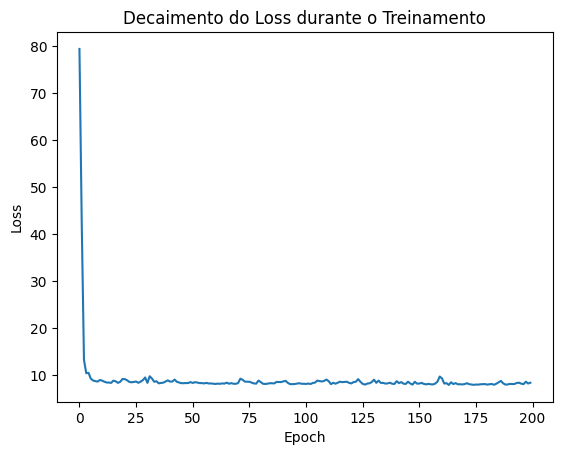

In [292]:
# Plotar o decaimento do loss ao longo das epochs
plt.plot(history.history['loss'])
plt.title('Decaimento do Loss durante o Treinamento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [293]:
loss = model.evaluate(X_test, y_test)
loss

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.1461  


7.098569393157959

In [294]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [295]:
predictions

array([[50.808327],
       [38.918   ],
       [31.329157],
       [50.017323],
       [61.281544],
       [48.77527 ],
       [38.47515 ],
       [39.97535 ],
       [37.531563],
       [43.685345],
       [55.98409 ],
       [44.255566],
       [39.712093],
       [50.28529 ],
       [35.422634],
       [48.491016],
       [41.997265],
       [52.623146],
       [50.824383],
       [43.44356 ],
       [47.772617],
       [38.618713],
       [45.17566 ],
       [41.02277 ],
       [47.1527  ],
       [39.464905],
       [38.825424],
       [41.231358],
       [48.977016],
       [38.667927],
       [54.315067],
       [36.519558],
       [45.94186 ],
       [54.165653],
       [36.521076],
       [52.321568]], dtype=float32)

In [296]:
y_pred = pd.DataFrame(predictions)
y_test = pd.DataFrame(y_test)

In [297]:
y_pred.index = y_test.index

In [298]:
df_combined = pd.concat([y_pred,y_test], axis=1)
df_combined.columns = ['y_pred', 'y_test']

In [299]:
df_combined['dif'] = (df_combined['y_pred'] - df_combined['y_test'])

In [300]:
df_combined.head(1)

,y_pred,y_test,dif
19,50.808327,58.4,-7.591673


In [301]:
mape = mean_absolute_percentage_error(df_combined['y_test'], df_combined['y_pred'])
print("Mean Absolute Percentage Error (MAPE):", mape*100)

# Calcular o R²
r2 = r2_score(df_combined['y_test'], df_combined['y_pred'])
print('R² =', r2)

Mean Absolute Percentage Error (MAPE): 7.098569943589133
R² = 0.7510071045689615


In [302]:
df_combined

,y_pred,y_test,dif
19,50.808327,58.4,-7.591673
45,38.917999,37.6,1.317999
139,31.329157,34.8,-3.470843
30,50.017323,49.2,0.817323
67,61.281544,66.0,-4.718456
16,48.775269,54.0,-5.224731
119,38.475151,40.8,-2.324849
173,39.975349,37.2,2.775349
109,37.531563,36.8,0.731563
140,43.685345,45.2,-1.514655


In [303]:
#model.save('ANN_13.keras')

**PPT AMBEV**

In [3]:
from tensorflow.keras.models import load_model

X = data[['Energy_Estimated(%)', 'Distance_Traveled(km)', 'Avg_Temperature(C)']]
y = data['Real_Energy_Expenditure(%)']
modelo_carregado = load_model('ANN_FINAL_x1_x2_x3.keras')

In [19]:
data['E_ANN'] = modelo_carregado.predict(X)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [6]:
mape = mean_absolute_percentage_error(y, teste_y_pred)
mse = mean_squared_error(y, teste_y_pred)
r2 = r2_score(y, teste_y_pred)

print(f"\nDesempenho do Modelo:")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


Desempenho do Modelo:
MAPE: 7.78%
MSE: 20.7683
R²: 0.7554


In [7]:
teste_y_pred = teste_y_pred.ravel()

In [8]:
data['E_predicted_ANN'] = teste_y_pred
data.head()

,ID_Rota,Energy_Estimated(%),Distance_Traveled(km),Avg_Temperature(C),Air_Humidity(%),Dist_Cluster_Clients(km),Route_Time(h),Total_Weighted_Mass(ton),Stdv_Altitudes(m),Wind_Speed(m/s),Avg_Speed(m/s),Number_Deliveries,Rain(mm),Max_Temp(C),Real_Energy_Expenditure(%),Erro,E_predicted_ANN
0,20230901_RHQ2H04,41.716498,40.4,22.144429,52.796897,14.067360,3.185833,8.094501,7.352432,1.495487,3.524209,10,0.0,27.5,41.2,-0.516498,38.401398
1,20230902_RHS6B08,47.357887,49.6,22.191493,67.361194,7.806090,2.211111,9.206331,8.139739,2.044776,6.244209,8,0.0,29.6,41.6,-5.757887,42.469391
2,20230902_RHS6F90,54.828160,50.1,23.431280,62.676540,15.033330,3.123611,8.473027,20.839832,2.096801,4.455477,13,0.0,29.6,46.4,-8.428160,46.821602
3,20230902_RHT4G96,45.270473,54.3,19.594087,76.893316,19.882506,3.283333,7.848595,10.572484,1.692545,4.597407,9,0.0,24.0,38.0,-7.270473,41.489059
4,20230904_RHQ2H05,70.687503,57.8,27.653575,51.407254,18.174622,3.598056,9.276940,21.626044,3.153472,4.485942,11,0.0,30.9,52.4,-18.287503,57.809246


In [50]:
data.head()

,ID_Rota,Energy_Estimated(%),Distance_Traveled(km),Avg_Temperature(C),Air_Humidity(%),Dist_Cluster_Clients(km),Route_Time(h),Total_Weighted_Mass(ton),Stdv_Altitudes(m),Wind_Speed(m/s),Avg_Speed(m/s),Number_Deliveries,Rain(mm),Max_Temp(C),Real_Energy_Expenditure(%),Erro,E_ANN,Energy_Expenditure,Energy_Expenditure_ANN
0,20230901_RHQ2H04,41.716498,40.4,22.144429,52.796897,14.067360,3.185833,8.094501,7.352432,1.495487,3.524209,10,0.0,27.5,41.2,-0.516498,38.401398,0.412,0.615986
1,20230902_RHS6B08,47.357887,49.6,22.191493,67.361194,7.806090,2.211111,9.206331,8.139739,2.044776,6.244209,8,0.0,29.6,41.6,-5.757887,42.469391,0.416,0.575306
2,20230902_RHS6F90,54.828160,50.1,23.431280,62.676540,15.033330,3.123611,8.473027,20.839832,2.096801,4.455477,13,0.0,29.6,46.4,-8.428160,46.821602,0.464,0.531784
3,20230902_RHT4G96,45.270473,54.3,19.594087,76.893316,19.882506,3.283333,7.848595,10.572484,1.692545,4.597407,9,0.0,24.0,38.0,-7.270473,41.489059,0.380,0.585109
4,20230904_RHQ2H05,70.687503,57.8,27.653575,51.407254,18.174622,3.598056,9.276940,21.626044,3.153472,4.485942,11,0.0,30.9,52.4,-18.287503,57.809246,0.524,0.421908


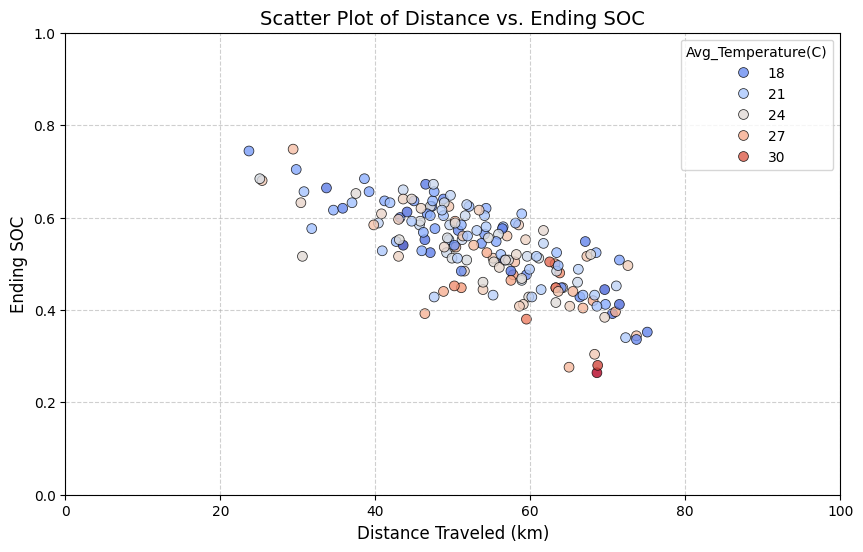

In [52]:
# Calcular a nova coluna de Energy Expenditure
data['Energy_Expenditure'] =  1 - data['Real_Energy_Expenditure(%)']/100
data['Energy_Expenditure_ANN'] = (105 - data['E_ANN']) / 105

# Criar a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))

# Criar o scatter plot
scatter = sns.scatterplot(
    x='Distance_Traveled(km)', 
    y='Energy_Expenditure', 
    hue='Avg_Temperature(C)',  # Usar a coluna de temperatura para colorir os pontos
    palette='coolwarm',  # Paleta de cores de quente para frio
    data=data, 
    s=50,  # Tamanho dos pontos
    alpha=0.8,  # Transparência
    edgecolor='k',  # Contorno preto nos pontos
    ax=ax  # Adicionar ao eixo definido
)



# Personalizar o gráfico
ax.set_xlabel('Distance Traveled (km)', fontsize=12)
ax.set_ylabel('Ending SOC', fontsize=12)
ax.set_title('Scatter Plot of Distance vs. Ending SOC', fontsize=14)

ax.set_xlim(0, 100)
ax.set_ylim(0, 1)

ax.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [9]:
teste_y_pred_inf = teste_y_pred * (1 - mape)
teste_y_pred_sup = teste_y_pred * (1 + mape)

interval_confidence = pd.DataFrame({
    'Actual Value (y)': y,               # Valor real
    'Prediction': teste_y_pred,          # Previsão
    'Lower Bound': teste_y_pred_inf,     # Limite inferior do intervalo de confiança
    'Upper Bound': teste_y_pred_sup      # Limite superior do intervalo de confiança
})

# Exibindo o dataframe
print(interval_confidence.head())

   Actual Value (y)  Prediction  Lower Bound  Upper Bound
0              41.2   38.401398    35.413483    41.389313
1              41.6   42.469391    39.164955    45.773827
2              46.4   46.821602    43.178532    50.464672
3              38.0   41.489059    38.260902    44.717216
4              52.4   57.809246    53.311256    62.307236


In [10]:
residuos = [y_t - y_p for y_t, y_p in zip(y, teste_y_pred)]

residuos = np.array(residuos, dtype=np.float64)

residuos = pd.Series(residuos)

C:\Users\duart\AppData\Local\Temp\ipykernel_14848\127783677.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuos, fit=norm, kde=True, bins=20, color='darkblue', label='Normal Fit & Histogram')


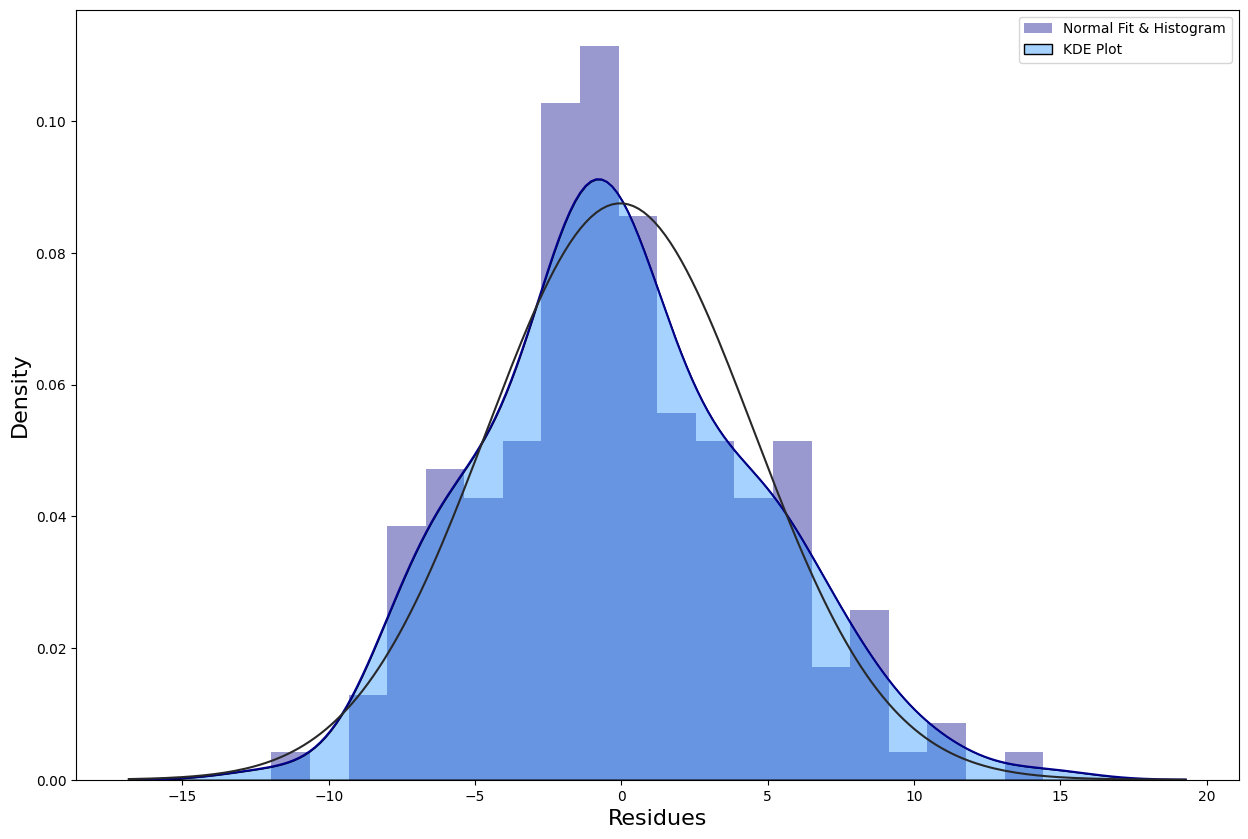

In [11]:
from scipy.stats import norm

plt.figure(figsize=(15, 10))

sns.distplot(residuos, fit=norm, kde=True, bins=20, color='darkblue', label='Normal Fit & Histogram')

sns.kdeplot(data=residuos, multiple="stack", alpha=0.4, color='dodgerblue', label='KDE Plot')

plt.xlabel('Residues', fontsize=16)
plt.ylabel('Density', fontsize=16)

plt.legend()

plt.show()

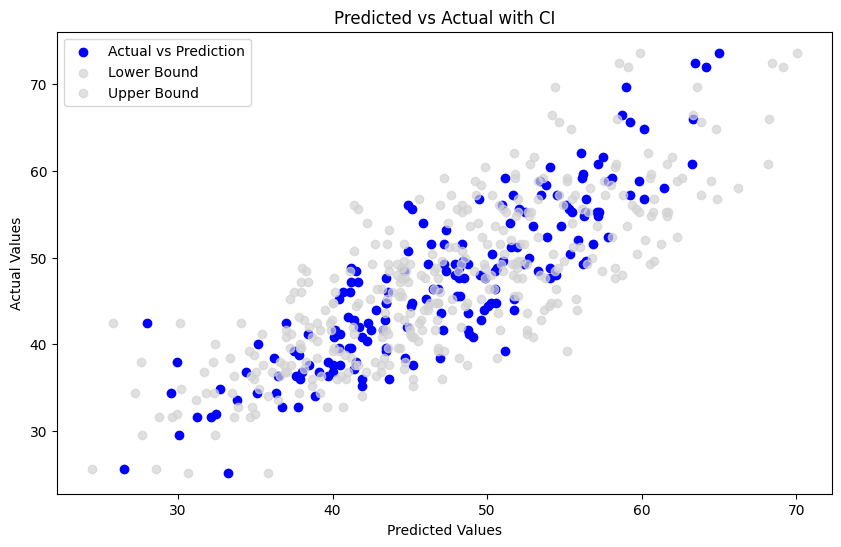

In [12]:
plt.figure(figsize=(10, 6))

# Scatter plot para as previsões vs valores reais
plt.scatter(teste_y_pred, y, label='Actual vs Prediction', color='blue')

# Scatter plot para os limites inferiores
plt.scatter(teste_y_pred_inf, y, color='lightgray', label='Lower Bound', alpha=0.7)

# Scatter plot para os limites superiores
plt.scatter(teste_y_pred_sup, y, color='lightgray', label='Upper Bound', alpha=0.7)

# Rótulos e título do gráfico
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs Actual with CI')

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

In [13]:
interval_confidence['lower_bound_errors'] = interval_confidence['Prediction'] - interval_confidence['Lower Bound']
interval_confidence['upper_bound_errors'] =  interval_confidence['Upper Bound'] - interval_confidence['Prediction']

In [14]:
interval_confidence

,Actual Value (y),Prediction,Lower Bound,Upper Bound,lower_bound_errors,upper_bound_errors
0,41.2,38.401398,35.413483,41.389313,2.987915,2.987915
1,41.6,42.469391,39.164955,45.773827,3.304436,3.304436
2,46.4,46.821602,43.178532,50.464672,3.643070,3.643070
3,38.0,41.489059,38.260902,44.717216,3.228157,3.228157
4,52.4,57.809246,53.311256,62.307236,4.497990,4.497990
5,37.6,45.193745,41.677334,48.710155,3.516411,3.516411
6,54.8,57.180111,52.731075,61.629147,4.449036,4.449036
7,34.0,38.872509,35.847939,41.897079,3.024570,3.024570
8,47.6,43.449993,40.069260,46.830727,3.380733,3.380733
9,57.2,53.474197,49.313507,57.634888,4.160690,4.160690


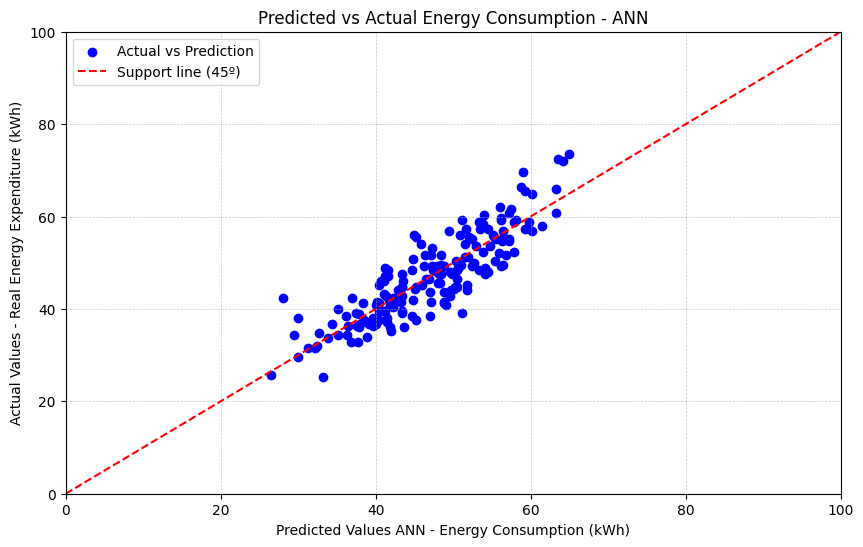

In [21]:
# Ajuste para evitar valores negativos nas barras de erro
lower_bound_errors = np.clip(interval_confidence['lower_bound_errors'], 0, None)
upper_bound_errors = np.clip(interval_confidence['upper_bound_errors'], 0, None)

plt.figure(figsize=(10, 6))

# Scatter plot das previsões vs valores reais
plt.scatter(teste_y_pred, y, color='blue', label='Actual vs Prediction')

# Adicionar a reta 45º (y = x) como referência
max_value = max(max(teste_y_pred), max(y))
plt.plot([0, 100], [0, 100], '--', color='red', label='Support line (45º)')

# Configurar a escala dos eixos começando em (0,0)
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adicionar título e legenda ao gráfico
plt.xlabel('Predicted Values ANN - Energy Consumption (kWh)')
plt.ylabel('Actual Values - Real Energy Expenditure (kWh)')
plt.title('Predicted vs Actual Energy Consumption - ANN')
plt.legend()

# Mostrar o gráfico
plt.show()

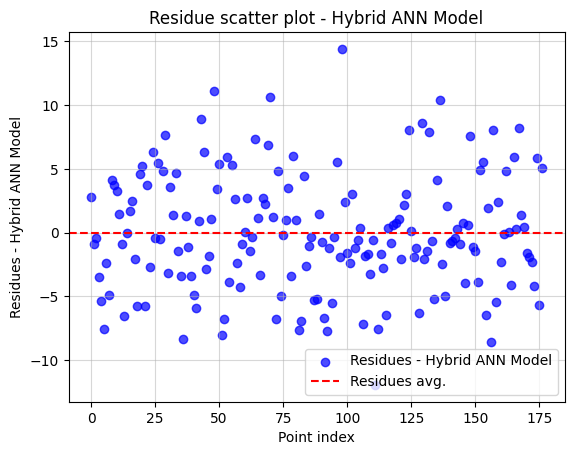

In [28]:
media_residuos = np.mean(residuos)

plt.scatter(range(len(residuos)), residuos, color='blue', alpha=0.7, label='Residues - Hybrid ANN Model')
plt.axhline(y=media_residuos, color='red', linestyle='--', label='Residues avg.')
plt.xlabel('Point index')
plt.ylabel('Residues - Hybrid ANN Model')
plt.title('Residue scatter plot - Hybrid ANN Model')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.5)

#plt.savefig('scatter_plot_XGB.png', dpi=300, bbox_inches='tight')

plt.show()

**RODAR A PARTIR DAQUI**

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('ANN_FINAL_x1_x2_x3.keras')

In [7]:
X = data[['Energy_Estimated(%)', 'Distance_Traveled(km)', 'Avg_Temperature(C)']]
y = data['Real_Energy_Expenditure(%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
verificacao = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


In [9]:
mape = mean_absolute_percentage_error(y_test, verificacao)
print("Mean Absolute Percentage Error (MAPE):", mape*100)

# Calcular o R²
r2 = r2_score(y_test, verificacao)
print('R² =', r2)

Mean Absolute Percentage Error (MAPE): 6.4095879116521095
R² = 0.8152031729642453


In [10]:
residuos = [y_t - y_p for y_t, y_p in zip(y_test, verificacao)]
residuos = np.array([x[0] for x in residuos], dtype=np.float64)
residuos = pd.Series(residuos)

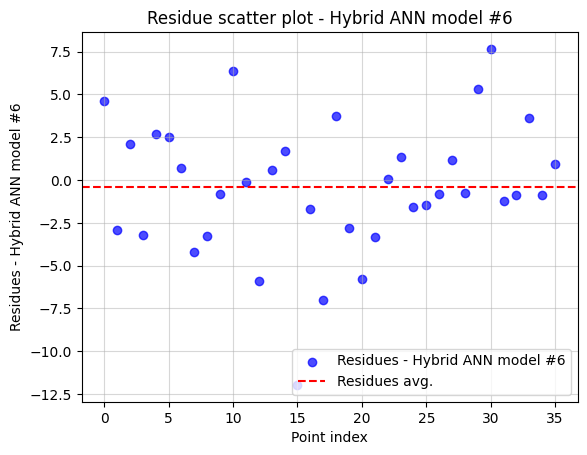

In [11]:
media_residuos = np.mean(residuos)

plt.scatter(range(len(residuos)), residuos, color='blue', alpha=0.7, label='Residues - Hybrid ANN model #6')
plt.axhline(y=media_residuos, color='red', linestyle='--', label='Residues avg.')
plt.xlabel('Point index')
plt.ylabel('Residues - Hybrid ANN model #6')
plt.title('Residue scatter plot - Hybrid ANN model #6')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.5)

plt.savefig('scatter_plot_ANN.png', dpi=300, bbox_inches='tight')

plt.show()

In [12]:
mean = np.mean(residuos)
std = np.std(residuos)

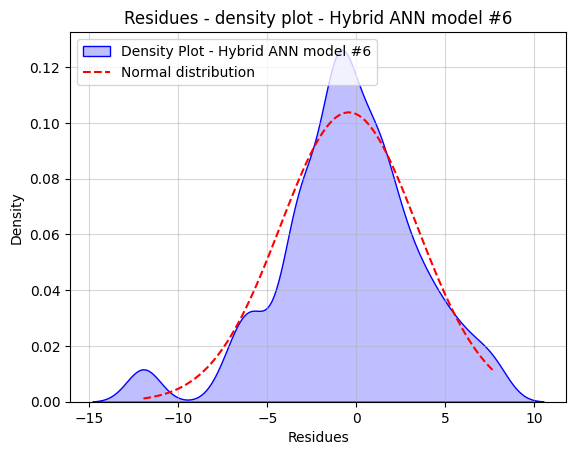

In [13]:
# Plotar a densidade dos resíduos
sns.kdeplot(residuos, fill=True, color='blue', label='Density Plot - Hybrid ANN model #6', bw_adjust=0.5)

# Criar os valores de x para a curva de distribuição normal
x_values = np.linspace(min(residuos), max(residuos), 100)

# Plotar a curva de distribuição normal usando a média e o desvio padrão dos resíduos
plt.plot(x_values, norm.pdf(x_values, mean, std), color='red', linestyle='dashed', label='Normal distribution')

# Configurações do gráfico
plt.title('Residues - density plot - Hybrid ANN model #6')
plt.xlabel('Residues')
plt.ylabel('Density')

# Exibir legenda e grade
plt.legend(loc='upper left')
plt.grid(True, alpha=0.5)

# Salvar o gráfico como imagem
plt.savefig('density_plot_ANN.png', dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [14]:
shapiro_test = stats.shapiro(residuos)
print("Estatística de teste:", shapiro_test[0])
print("Valor-p:", shapiro_test[1])

Estatística de teste: 0.9771644473075867
Valor-p: 0.6490827202796936


In [15]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

X_test_v2 = sm.add_constant(X_test)

# Realiza o teste de Breusch-Pagan/Cook-Weisberg
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuos, X_test_v2)

# Imprime os resultados
print("Estatística LM:", lm)
print("Valor-p LM:", lm_p_value)
print("Estatística F:", fvalue)
print("Valor-p F:", f_p_value)

Estatística LM: 3.3938791649453344
Valor-p LM: 0.33478868281539037
Estatística F: 1.1102632521835287
Valor-p F: 0.3593524872500941


In [16]:
from scipy.stats import norm

# Calcula o teste de Durbin-Watson
durbin_watson_test = sm.stats.stattools.durbin_watson(residuos)

# Imprime o resultado
print("Estatística de Durbin-Watson:", durbin_watson_test)

nobs = len(residuos)
nvars = 2

# Calculando o valor crítico DW
d_critico = sm.stats.stattools.durbin_watson(residuos)

# Calculando DL, DU, 4-DL e 4-DU
DL = 1.521 - 1.25 * (nvars / nobs)
DU = 1.521 + 1.25 * (nvars / nobs)
quatro_DL = 4.0 - DL
quatro_DU = 4.0 - DU

# Imprimindo os resultados
print("DL:", DL)
print("DU:", DU)
print("4-DL:", quatro_DL)
print("4-DU:", quatro_DU)

Estatística de Durbin-Watson: 1.920376619782295
DL: 1.4515555555555555
DU: 1.5904444444444443
4-DL: 2.5484444444444447
4-DU: 2.4095555555555555


In [19]:
n = X_test.shape[0]
k = X_test.shape[1]

In [25]:
verificacao = verificacao.ravel()

In [26]:
y_test_mean = np.mean(y_test)

# Calcular SSR (Sum of Squares Regression)
SSR = np.sum((verificacao - y_test_mean) ** 2)

# Calcular SSE (Sum of Squares Error)
SSE = np.sum((y_test - verificacao) ** 2)

# Calcular SST (Sum of Squares Total)
SST = np.sum((y_test - y_test_mean) ** 2)

# Calcular MSR (Mean Square Regression)
MSR = SSR / k

# Calcular MSE (Mean Square Error)
MSE = SSE / (n - k - 1)

# Calcular a estatística F
F_statistic = MSR / MSE

# Exibir os resultados
print(f'SSR (Sum of Squares Regression): {SSR}')
print(f'SSE (Sum of Squares Error): {SSE}')
print(f'MSR (Mean Square Regression): {MSR}')
print(f'MSE (Mean Square Error): {MSE}')
print(f'Estatística F: {F_statistic}')

SSR (Sum of Squares Regression): 1916.4482421875
SSE (Sum of Squares Error): 538.7492776669577
MSR (Mean Square Regression): 638.8160807291666
MSE (Mean Square Error): 16.83591492709243
Estatística F: 37.943651027909446


In [27]:
from scipy.stats import f

df1 = k  
df2 = n - k - 1  

# Calcular o p-valor da estatística F
p_value = f.sf(F_statistic, df1, df2)

print(f'Prob (F-statistic): {p_value}')

Prob (F-statistic): 1.1886255104241903e-10


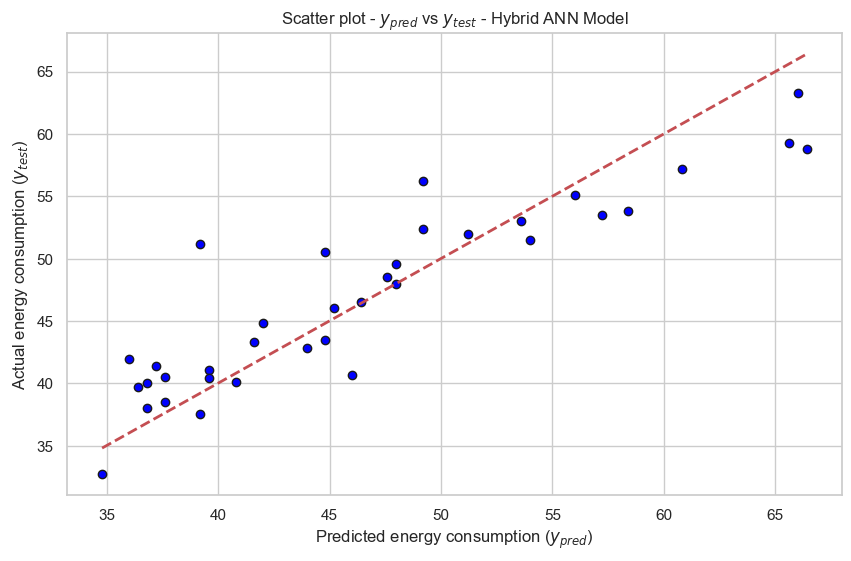

In [31]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
plt.scatter(y_test, verificacao, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Predicted energy consumption ($y_{pred}$)')
plt.ylabel('Actual energy consumption ($y_{test}$)')
plt.title('Scatter plot - $y_{pred}$ vs $y_{test}$ - Hybrid ANN Model')

plt.savefig('pred_ANN.png', dpi=300, bbox_inches='tight')

plt.show()